In [270]:
import numpy as np
from numpy.random import Generator, PCG64
import matplotlib.pyplot as plt

# Assignment 2 (NIT Analysis)

During the last lectures, we have analysed in different ways the properties of the Harvest Process finding the Noise Induced Transitions that characterize this model. In this second assignment, I will ask you to perform the same kind of tests and analysis seen in class to explore the model. I would like to see a complete analysis therefore you should start in analyzing the critical point of the model for the different region of the parameters'space. After this, you should analyse the Noise Induced Transition understanding how the noise affects the behaviour in the different regions of the parameters space, as done in class. 
The proposed model is the following one:

$$
dx = \left[a_0x(1-x)-kx+\beta\right]dt+sx(1-x)dW
$$

which is almost identical to the Harvest Process but this time, we have also a positive inflow term $\beta$ which is independent by the state of the variable $x$. For simplicity, we will set $a_0=1$.
As said, the analysis of the critical points,the NITs and the behaviours has to be conducted as we done in class in the last two lectures (obviously the regions will be different and you have to discover them) via numerical analysis. However...

**EXTRA**: ... as extra, I will be glad to see some qualitative analysis. This task is optional as always, however, I strongly suggest you to do it because can help you to limit the different regions of the parameters'space, and their properties, without searching randomly. 

# Qualitative analysis

A first way to analyze is to take a 
this is equivalent of analyzing the function when $s=0$
$$
f(x)=a_0x(1-x)-kx+\beta
$$
we can find two $f(x)=0$
$$
x_1=-\frac{(k-\alpha_0)+\sqrt{(\alpha_0-k)^2+4\alpha_0\beta}}{2\alpha_0}
x_2=-\frac{(k-\alpha_0)-\sqrt{(\alpha_0-k)^2+4\alpha_0\beta}}{2\alpha_0}, 
$$

with wich we can delimit the area $a_0x(1-x)-kx+\beta\geq 0$ as $x_1\leq x \leq x_2$

knowing that all of these parameters must be positive we also know that $x_1$ has no solution where $x_1\geq 0$, therefore we can ignore it (even though it would be a repulsor point) and count just $x_2$ as an critical point, this is because between 0 and 1 the value of x would be less then 0.

now to check if $x_2$ is an attractor point we have to check the sign of $f'(x_2)$
$$(\alpha_0-2\alpha_0x_2-k)=-\sqrt{(\alpha_0-k)^2+4\alpha_0\beta}$$ 
which is always <0 and therfore always an attractor

in order to take in consideration the stochastic part we have to find out when does the deterministic part becomes greater then $g(x)g'(x)$ 

$a_0x(1-x)-kx+\beta \geq sx(1-x)s(1-2x)$

$-2s^2x^3+x^2(3s^2-\alpha_0)+x(\alpha_0-s^2-k)+\beta \geq 0$

since all of the parameters must be positive, this can go from having 1 solution to up to 3 solutions, but since this is a cubic equation it can at maximum have 2 attractor points and a central repulsor point.

also due to the fact that $\beta>0$ we can always have atleast one positive solution

looking at this equation graphically on a graphical tool like desmos we can qualitatively asses that the most important components for the placement of this equation are $\alpha_0$ and $\beta$, while the shape is defined mainly by k and s.  

we can study de discriminant to find out where we have 1, 2 or 3 solutions, the determinant of a cubic equation is:

$\Delta = \frac{4(b^2-3ac)^3-(2b^3-9abc+27a^2d)^2}{27a^2}$

which in our case becomes:

$$\frac{4((3s^2-\alpha_0)^2-3(2s^2)(\alpha_0-s^2-k))^3-(2(3s^2-\alpha_0)^3-9(2s^2)(3s^2-\alpha_0)(\alpha_0-s^2-k)+27(2s^4 \beta))^2}{27(2s^2)^2}$$
and to have 2 or 3 solutions it must be $\geq 0$

$4((3s^2-\alpha_0)^2-3(2s^2)(\alpha_0-s^2-k))^3-(2(3s^2-\alpha_0)^3-9(2s^2)(3s^2-\alpha_0)(\alpha_0-s^2-k)+27(2s^4 \beta))^2 \geq 0$

$4((3s^2-\alpha_0)^2-3(2s^2)(\alpha_0-s^2-k))^3\geq (2(3s^2-\alpha_0)^3-9(2s^2)(3s^2-\alpha_0)(\alpha_0-s^2-k)+27(2s^4 \beta))^2$

$4(b^2-3ac)^3 \geq (2b^3-9abc+27a^2d)^2$

$a^2(b^2c^2+ 18abcd)\geq a^2(4ac^3 + 27a^2d^2 + 4b^3d)$

now, this is a not-so-easy to study disequation, and there doesn't look like there is an explicit relations between the parameters, therfore we proceed with a numerical analisys of the model

# Numerical Analysis


## varying S

first let's test with a very small s if the results comes near what we predicted in the first study of f(x)

In [ ]:
N = 500
a_0 = 1.0
b=0.05
k = 0.3

x = np.linspace(0,1,N)
s = np.linspace(0,3.0,N)

values = np.zeros((N,N),dtype=float)
values_bin=np.zeros((N,N),dtype=float)

#by variying s we see which values are <0
#keeping a0 k e beta still


#i changed the code used during the lectures to have both the binary positive/negative 
# and nuanced values that x takes with varying s
for i in range(len(x)):
    for j in range(len(s)):
        values[i,j] = a_0*x[i]*(1-x[i])-k*x[i]+b-s[j]*s[j]*x[i]*(1-x[i])*(1-2*x[i])
        if values[i,j]>=0:
            values_bin[i,j] = 1
        else:
            values_bin[i,j] = -1


#used later in the gradient color mesh
values_bin_grad=np.gradient(values_bin)

#i find the critical points by seeing where the gradient changes
critical_points = []
for j in range(len(s)):
    for i in range(len(x)-1):
        if values_bin[i,j] != values_bin[i+1,j]:
            critical_points.append((s[j], x[i]))



0.7653311931459037


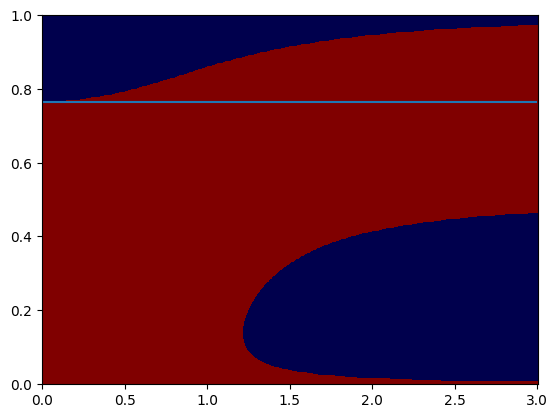

In [ ]:
plt.pcolormesh(s,x,values_bin, cmap="seismic")
#this is the calculation i derived for x2
print(-((k-a_0)-np.sqrt(np.pow((a_0-k),2)+4*a_0*b))/(2*a_0))
plt.hlines(-((k-a_0)-np.sqrt(np.pow((a_0-k),2)+4*a_0*b))/(2*a_0),0,3) #I plot x2 to show how s influences x with respect to the starting critical point

with this we can confirm that at $s=0$, but also for $s\lesssim 1.2$, there is only one critical point

to better look at what we did untill now let's modify a bit the colormesh shown until now, this will show the slope taken by the function at any given time, the black and white line indicates the points where f(x)-g(x)g(x)' equals 0: white means that at that point the function is gonig from being positive to negative, indicating an attractor point; black means the oppsite, indicating a repulsor point.

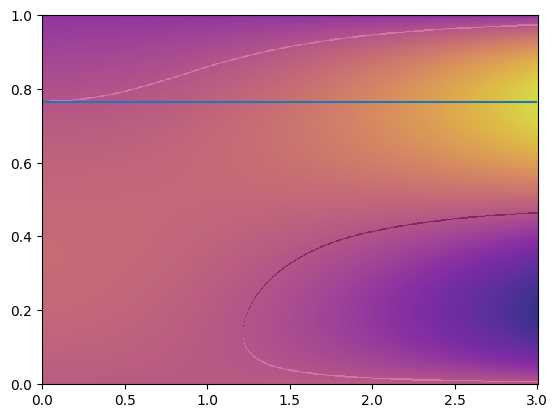

In [273]:
plt.pcolormesh(s,x,values, cmap="plasma")
plt.pcolormesh(s,x,values_bin_grad[0], cmap="Grays",alpha=0.3)
plt.hlines(-((k-a_0)-np.sqrt(np.pow((a_0-k),2)+4*a_0*b))/(2*a_0),0,3)


In [274]:
class Harvest(object):
    '''
    This function will simulate trajectories for an initialize
    perturbed logistic system
    '''
    #changed the parameters
#                        alpha0,   beta, k
    def __init__(self,a0: float, b:float, k:float, s:float)->None:
        self.a0=a0
        self.b = b
        self.k = k
        self.s = s
        if(a0<=0 or b<=0 or k<=0 or s<=0):
            raise RuntimeError("One of the given parameters is 0 or negative")
        
        return

    def __checkInputs(self,x0: float,T: float,N: int)->None:
        '''
        Given the inputs for a trajectory, this method will
        check if they are correct
        '''
        #x0 checks:
        if x0<0:
            raise RuntimeError("Initial population must be positive")

        #T checks:
        if T<0:
            raise RuntimeError("Time interval must have a positive lenght")

        #N checks:
        if N<=1:
            raise RuntimeError("The simulation must have at least two steps")

        return

    def __RK4(self,t_n: float,y_n: float,h: float)->float:
        '''
        Given a point in the trajectory, the time instant and the step lenght,
        this method will compute the variation for y using the RK4 for the 
        deterministic part of the PLS
        '''
        #Perform the check of the inputs. For N we hard code a good 
#        self.__checkInputs(y_n,t_n,10)
        
        if h<=0:
            raise RuntimeError("Given h is negative or 0")

        f = lambda x: self.a0*x*(1-x)-self.k*x+self.b   ### <- changed the function to the deterministic part of the PLS
        
        k_1 = f(y_n)
        k_2 = f(y_n+h*k_1/2)
        k_3 = f(y_n+h*k_2/2)
        k_4 = f(y_n+h*k_3)

        return h*(k_1+2*k_2+2*k_3+k_4)/6
        
        
    
    def simulateTraj(self,x0: float,T: float,N: int): 
        '''
        Given the initial population value x0, the considered interval lenght T
        and the number of step in the computation N, this method will return a
        trajectory for the PLS.
        '''
        #Check the inputs
        self.__checkInputs(x0,T,N)

        if T==0:
            return np.array([x0])

        #Setup step lenght and traj array
        h = T/N
        traj = np.zeros(N+1,dtype=float)
        traj[0] = x0
        time = np.zeros(N+1,dtype=float)
        time[0] = 0.0

        #Setup random generator
        rng = Generator(PCG64())

        for i in range(1,N+1):
            time[i] = i*h
            dx = self.__RK4(time[i-1],traj[i-1],h) #determinstic part
            dx += self.s*traj[i-1]*(1.0-traj[i-1])*rng.normal()*np.sqrt(h) #noise part
            traj[i] = traj[i-1] + dx
            if traj[i]<0: traj[i]=0.0

        return traj,time

In [275]:
#let's see if with a very small s it goes near x2

omega = [0.0,1.0] 
Nbins = 150 
Nsim = 5000 
m = (omega[1]-omega[0])/Nbins
system = Harvest(1,0.05,0.3,0.001)

rng_0 = Generator(PCG64())

bins = np.zeros(Nbins,dtype=float)

for _ in range(Nsim):
    ptraj,ttraj = system.simulateTraj(rng_0.uniform(low=omega[0],high=omega[1]),50,500)
    for i in range(Nbins):
        if ptraj[-1] < (m*(i+1)+omega[0]):
            bins[i] += 1.0
            break

bins = bins/(Nsim*m)



Critical points at s=0.0: [np.float64(0.7635270541082164), np.float64(0.7635270541082164)]


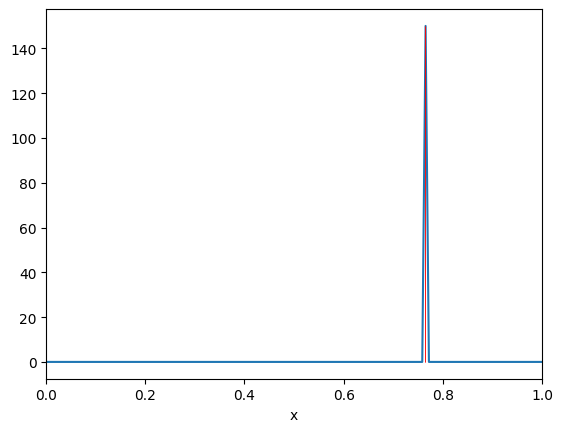

In [ ]:
x = np.linspace(omega[0],omega[1],Nbins)

plt.xlabel("x")
plt.xlim(0.0,1.0)
plt.plot(x,bins)

# lets extract all the critical points from the ones we found earlier
s = np.linspace(0,3.0,N)
# find the nearest s to the one we used
closest_s=min(range(len(s)), key=lambda i: abs(s[i]-0.001))
#find the values
critical_x_values = [x_val for s_val, x_val in critical_points if abs(s_val - s[closest_s]) < 0.01]
print(f"Critical points at s={s[closest_s]}: {critical_x_values}")

#plot them
for x_val in critical_x_values:
    plt.vlines(x_val, 0, max(bins), colors='red', linewidth=0.5)

In [277]:
#let's see if with a bigger s it creates a bifurcation

omega = [0.0,1.0] 
Nbins = 150 
Nsim = 5000 
m = (omega[1]-omega[0])/Nbins
system = Harvest(1,0.05,0.3,2.3)

rng_0 = Generator(PCG64())

bins = np.zeros(Nbins,dtype=float)

for _ in range(Nsim):
    ptraj,ttraj = system.simulateTraj(rng_0.uniform(low=omega[0],high=omega[1]),50,500)
    for i in range(Nbins):
        if ptraj[-1] < (m*(i+1)+omega[0]):
            bins[i] += 1.0
            break

bins = bins/(Nsim*m)

Critical points at s=2.302605210420842: [np.float64(0.01002004008016032), np.float64(0.4348697394789579), np.float64(0.9559118236472945), np.float64(0.01002004008016032), np.float64(0.4348697394789579), np.float64(0.9559118236472945), np.float64(0.01002004008016032), np.float64(0.4368737474949899), np.float64(0.9559118236472945)]


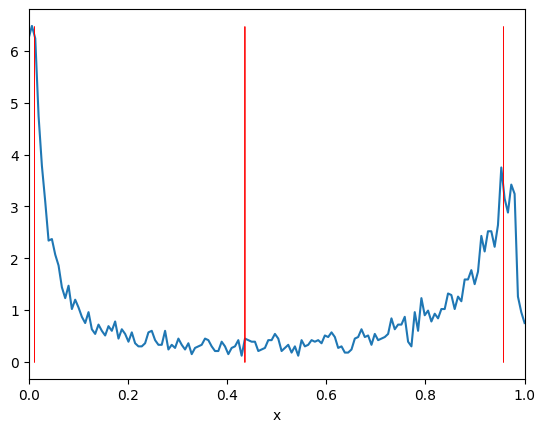

In [278]:
x = np.linspace(omega[0],omega[1],Nbins)

plt.xlabel("x")
plt.xlim(0.0,1.0)
plt.plot(x,bins)

s = np.linspace(0,3.0,N)
closest_s=min(range(len(s)), key=lambda i: abs(s[i]-2.3))
critical_x_values = [x_val for s_val, x_val in critical_points if abs(s_val - s[closest_s]) < 0.01]
print(f"Critical points at s={s[closest_s]}: {critical_x_values}")
for x_val in critical_x_values:
    plt.vlines(x_val, 0, max(bins), colors='red', linewidth=0.5)

as we can see from the plot above, even though in the original colormesh, at $s=2$, there are 3 points where $f(x)-g(x)g(x)'=0$ of which only 2 are attractor points.

now let's see what happens when you increase k.

In [279]:
N = 500
a_0 = 1.0
b=0.16  #<- from 0.05 to 0.16 this is to move the function and make it cross the =0 threshold more
k = 0.8  #<- by modifying k we increased the positive zones and made the fucntion more centrated on x=0.5

x = np.linspace(0,1,N)
s = np.linspace(0,3.0,N)

values = np.zeros((N,N),dtype=float)

for i in range(len(x)):
    for j in range(len(s)):
        values[i,j] = a_0*x[i]*(1-x[i])-k*x[i]+b-s[j]*s[j]*x[i]*(1-x[i])*(1-2*x[i])
        if values[i,j]>=0:
            values_bin[i,j] = 1
        else:
            values_bin[i,j] = -1


#used later in the gradient color mesh
values_bin_grad=np.gradient(values_bin)

#i find the critical points 
critical_points = []
for j in range(len(s)):
    for i in range(len(x)-1):
        if values_bin[i,j] != values_bin[i+1,j]:
            critical_points.append((s[j], x[i]))

0.512310562561766


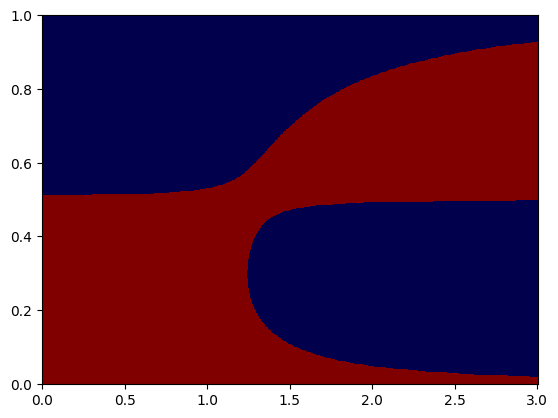

In [280]:
plt.pcolormesh(s,x,values_bin, cmap="seismic")
print(-((k-a_0)-np.sqrt(np.pow((a_0-k),2)+4*a_0*b))/(2*a_0))

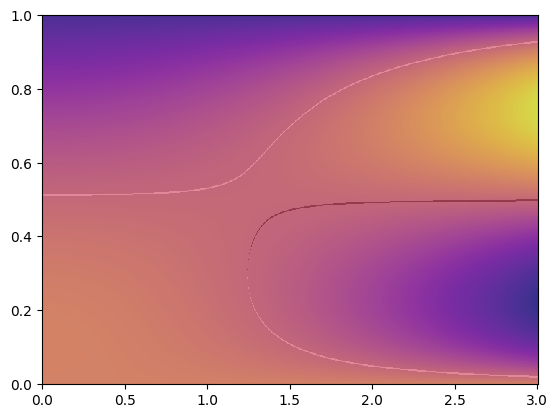

In [281]:
plt.pcolormesh(s,x,values, cmap="plasma")
plt.pcolormesh(s,x,values_bin_grad[0], cmap="Grays",alpha=0.3)

In [282]:
omega = [0.0,1.0] 
Nbins = 150 
Nsim = 5000 
m = (omega[1]-omega[0])/Nbins
system = Harvest(1,0.16,0.8,0.2) #lets put s small in order to look at the behaviour of the deterministic part

rng_0 = Generator(PCG64())

bins = np.zeros(Nbins,dtype=float)

for _ in range(Nsim):
    ptraj,ttraj = system.simulateTraj(rng_0.uniform(low=omega[0],high=omega[1]),50,500)
    for i in range(Nbins):
        if ptraj[-1] < (m*(i+1)+omega[0]):
            bins[i] += 1.0
            break

bins = bins/(Nsim*m)

Critical points at s=0.19839679358717435: [np.float64(0.5110220440881763), np.float64(0.5110220440881763), np.float64(0.5110220440881763)]


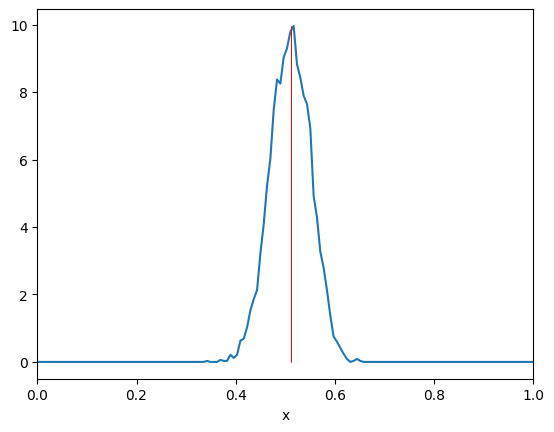

In [283]:
x = np.linspace(omega[0],omega[1],Nbins)

plt.xlabel("x")
plt.xlim(0.0,1.0)
plt.plot(x,bins)

s = np.linspace(0,3.0,N)
closest_s=min(range(len(s)), key=lambda i: abs(s[i]-0.2))
critical_x_values = [x_val for s_val, x_val in critical_points if abs(s_val - s[closest_s]) < 0.01]
print(f"Critical points at s={s[closest_s]}: {critical_x_values}")
for x_val in critical_x_values:
    plt.vlines(x_val, 0, max(bins), colors='red', linewidth=0.5)

In [ ]:
omega = [0.0,1.0] 
Nbins = 150 
Nsim = 5000
m = (omega[1]-omega[0])/Nbins
system = Harvest(1,0.16,0.8,2) #lets put s to an interesting value to look at the distribution

rng_0 = Generator(PCG64())

bins = np.zeros(Nbins,dtype=float)

for _ in range(Nsim):
    ptraj,ttraj = system.simulateTraj(rng_0.uniform(low=omega[0],high=omega[1]),50,500)
    for i in range(Nbins):
        if ptraj[-1] < (m*(i+1)+omega[0]):
            bins[i] += 1.0
            break

bins = bins/(Nsim*m)

Critical points at s=2.002004008016032: [np.float64(0.04809619238476953), np.float64(0.49098196392785565), np.float64(0.8336673346693386), np.float64(0.04809619238476953), np.float64(0.49098196392785565), np.float64(0.8336673346693386), np.float64(0.04809619238476953), np.float64(0.49098196392785565), np.float64(0.8356713426853707)]


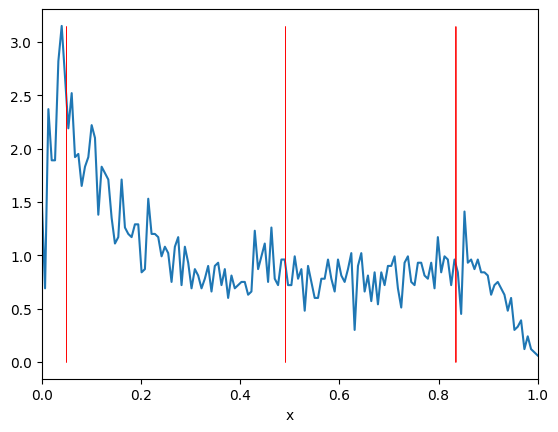

In [285]:
x = np.linspace(omega[0],omega[1],Nbins)

plt.xlabel("x")
plt.xlim(0.0,1.0)
plt.plot(x,bins)

s = np.linspace(0,3.0,N)
closest_s=min(range(len(s)), key=lambda i: abs(s[i]-2))
critical_x_values = [x_val for s_val, x_val in critical_points if abs(s_val - s[closest_s]) < 0.01]
print(f"Critical points at s={s[closest_s]}: {critical_x_values}")
for x_val in critical_x_values:
    plt.vlines(x_val, 0, max(bins), colors='red', linewidth=0.5)

if we look both at the shape of the function on a graphical calculator and the shape of this distribution, it's clear that the size of the spikes depends on the slope near the critical points.

# varying k

In [323]:
N = 500
a_0 = 1.0
b=0.16  #<- from 0.05 to 0.16 this is to move the function and make it cross the =0 threshold more
s = 2.3  #<- by modifying k we increased the positive zones and made the fucntion more centrated on x=0.5

x = np.linspace(0,1,N)
k = np.linspace(0,3.0,N)

values = np.zeros((N,N),dtype=float)

for i in range(len(x)):
    for j in range(len(k)):
        values[i,j] = a_0*x[i]*(1-x[i])-k[j]*x[i]+b-s*s*x[i]*(1-x[i])*(1-2*x[i])
        if values[i,j]>=0:
            values_bin[i,j] = 1
        else:
            values_bin[i,j] = -1


#used later in the gradient color mesh
values_bin_grad=np.gradient(values_bin)

#i find the critical points 
critical_points = []
for j in range(len(k)):
    for i in range(len(x)-1):
        if values_bin[i,j] != values_bin[i+1,j]:
            critical_points.append((k[j], x[i]))

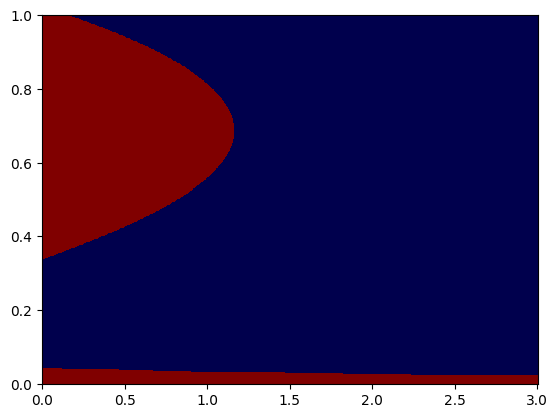

In [325]:
plt.pcolormesh(k,x,values_bin, cmap="seismic")

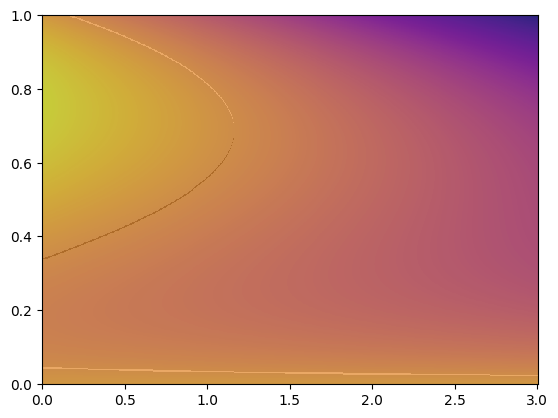

In [327]:
plt.pcolormesh(k,x,values, cmap="plasma")
plt.pcolormesh(k,x,values_bin_grad[0], cmap="Grays",alpha=0.3)

at lower k-s there seems to be an inversion of the trends, even if barely so let's check the distribution in those points

In [ ]:
#let's check what happens with a small k but a large s

omega = [0.0,1.0] 
Nbins = 150 
Nsim = 5000
m = (omega[1]-omega[0])/Nbins
system = Harvest(1,0.16,0.5,2.3)

rng_0 = Generator(PCG64())

bins = np.zeros(Nbins,dtype=float)

for _ in range(Nsim):
    ptraj,ttraj = system.simulateTraj(rng_0.uniform(low=omega[0],high=omega[1]),50,500)
    for i in range(Nbins):
        if ptraj[-1] < (m*(i+1)+omega[0]):
            bins[i] += 1.0
            break

bins = bins/(Nsim*m)

Critical points at s=0.49899799599198397: [np.float64(0.03607214428857715), np.float64(0.4228456913827655), np.float64(0.9418837675350701), np.float64(0.03607214428857715), np.float64(0.4248496993987976), np.float64(0.9418837675350701), np.float64(0.03607214428857715), np.float64(0.42685370741482964), np.float64(0.939879759519038)]


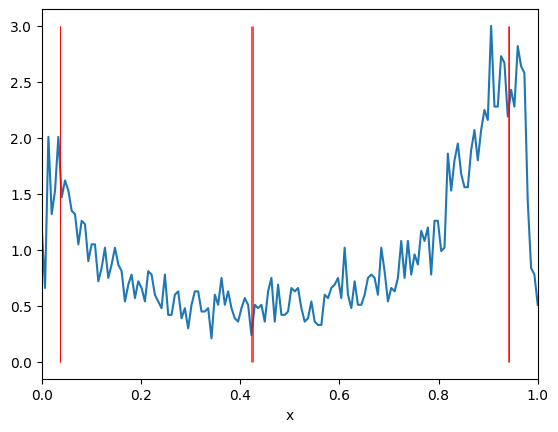

In [330]:
x = np.linspace(omega[0],omega[1],Nbins)

plt.xlabel("x")
plt.xlim(0.0,1.0)
plt.plot(x,bins)

k = np.linspace(0,3.0,N)
closest_s=min(range(len(k)), key=lambda i: abs(k[i]-0.5))
critical_x_values = [x_val for s_val, x_val in critical_points if abs(s_val - s[closest_s]) < 0.01]
print(f"Critical points at s={s[closest_s]}: {critical_x_values}")
for x_val in critical_x_values:
    plt.vlines(x_val, 0, max(bins), colors='red', linewidth=0.5)

while the trend of what happens at k seems to invert (as in, with a growing k the function gets flatter while with a bigger s the functions has higher peaks), the existance of only 2 attractors with a repulsor at the center, this form is dictated by the shape of the disequation being cubic.

In [334]:
#let's check what happens both with a large k and a large s

omega = [0.0,1.0] 
Nbins = 150 
Nsim = 5000
m = (omega[1]-omega[0])/Nbins
system = Harvest(1,0.16,2,2.3)

rng_0 = Generator(PCG64())

bins = np.zeros(Nbins,dtype=float)

for _ in range(Nsim):
    ptraj,ttraj = system.simulateTraj(rng_0.uniform(low=omega[0],high=omega[1]),50,500)
    for i in range(Nbins):
        if ptraj[-1] < (m*(i+1)+omega[0]):
            bins[i] += 1.0
            break

bins = bins/(Nsim*m)

Critical points at s=2.002004008016032: [np.float64(0.026052104208416832), np.float64(0.026052104208416832), np.float64(0.026052104208416832)]


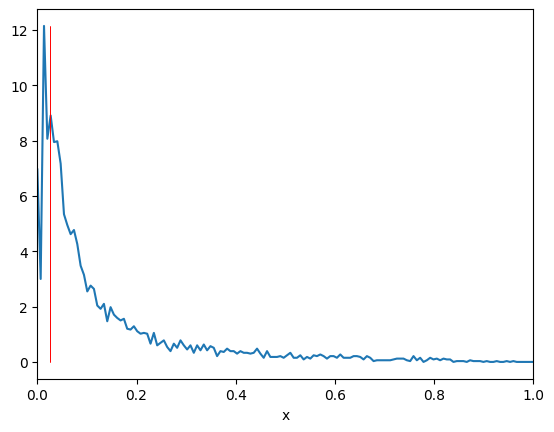

In [337]:
x = np.linspace(omega[0],omega[1],Nbins)

plt.xlabel("x")
plt.xlim(0.0,1.0)
plt.plot(x,bins)

k = np.linspace(0,3.0,N)
closest_s=min(range(len(k)), key=lambda i: abs(k[i]-2))
critical_x_values = [x_val for s_val, x_val in critical_points if abs(s_val - s[closest_s]) < 0.01]
print(f"Critical points at s={s[closest_s]}: {critical_x_values}")
for x_val in critical_x_values:
    plt.vlines(x_val, 0, max(bins), colors='red', linewidth=0.5)

# Varying $\beta$

since  $\beta$ is a new variable that complicates the qualitative study of the function, let's now keep s stable and see the behavior when changing $\beta$

In [303]:
N = 500

#these values have been choosen by qualitatively thinking about the shape of the function, a big s and k give an accentuated function,
#which, since beta dictates the "position" of the function, makes for a better plot
a_0 = 0.1
s= 4.4
k = 3.6

x = np.linspace(0,1,N)
b = np.linspace(0,3.0,N)

values = np.zeros((N,N),dtype=float)
values = np.zeros((N,N),dtype=float)

for i in range(len(x)):
    for j in range(len(b)):
        values[i,j] = a_0*x[i]*(1-x[i])-k*x[i]+b[j]-s*s*x[i]*(1-x[i])*(1-2*x[i])
        if values[i,j]>=0:
            values_bin[i,j] = 1
        else:
            values_bin[i,j] = -1


#used later in the gradient color mesh
values_bin_grad=np.gradient(values_bin)

#i find the critical points 
critical_points = []
for j in range(len(b)):
    for i in range(len(x)-1):
        if values_bin[i,j] != values_bin[i+1,j]:
            critical_points.append((b[j], x[i]))
            

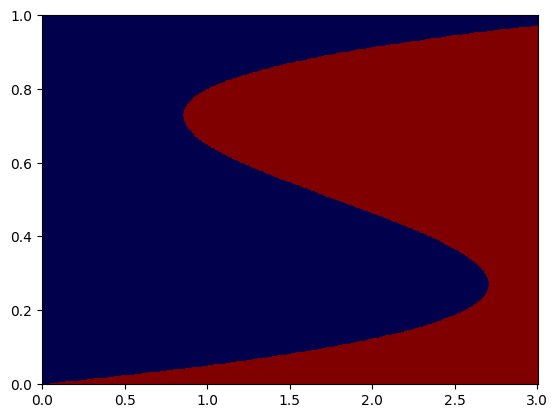

In [304]:
plt.pcolormesh(b,x,values_bin, cmap="seismic")

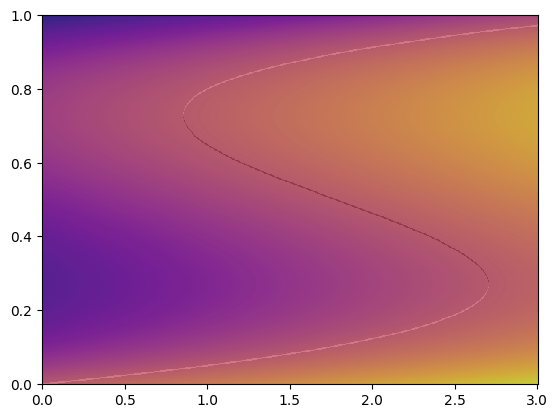

In [305]:
plt.pcolormesh(b,x,values, cmap="plasma")
plt.pcolormesh(b,x,values_bin_grad[0], cmap="Grays",alpha=0.3)

In [306]:
omega = [0.0,1.0] 
Nbins = 150 
Nsim = 5000 
m = (omega[1]-omega[0])/Nbins

system = Harvest(0.1,2,3.6,4.4)

rng_0 = Generator(PCG64())

bins = np.zeros(Nbins,dtype=float)

for _ in range(Nsim):
    ptraj,ttraj = system.simulateTraj(rng_0.uniform(low=omega[0],high=omega[1]),50,500)
    for i in range(Nbins):
        if ptraj[-1] < (m*(i+1)+omega[0]):
            bins[i] += 1.0
            break

bins = bins/(Nsim*m)

Critical points at s=2.002004008016032: [np.float64(0.12024048096192384), np.float64(0.4629258517034068), np.float64(0.9118236472945891), np.float64(0.1222444889779559), np.float64(0.4609218436873747), np.float64(0.9118236472945891), np.float64(0.1222444889779559), np.float64(0.4609218436873747), np.float64(0.9118236472945891)]


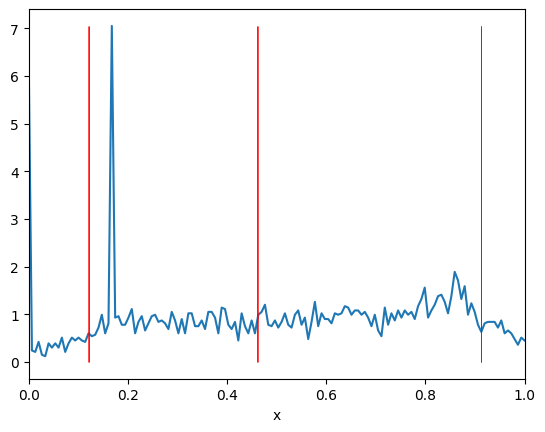

In [307]:
x = np.linspace(omega[0],omega[1],Nbins)

plt.xlabel("x")
plt.xlim(0.0,1.0)
plt.plot(x,bins)

b = np.linspace(0,3.0,N)
closest_s=min(range(len(b)), key=lambda i: abs(b[i]-2))
critical_x_values = [x_val for s_val, x_val in critical_points if abs(s_val - b[closest_s]) < 0.01]
print(f"Critical points at s={b[closest_s]}: {critical_x_values}")
for x_val in critical_x_values:
    plt.vlines(x_val, 0, max(bins), colors='red', linewidth=0.5)

this shape does not seem to follow the distribution dictated that much, but there seems to be a spike both at around 0.2 and 0.9, kind of like in the colormesh above, if i had to theorize why, it might be due to the intensity of the slopes given by the high value of s, which makes it easyer for the repulsor point to point to 0.2 instead of the second point, also, due to the behaviour of the deterministic part and the high volutility given by s, there is a higher chance of the final step being in the lower quartile then in the highest one,

to increase the chance of having the final result being in the higher quartile of the distribution let's increase the number of steps, this will let trajectory have more steps to grow, balancing out the distribution

In [320]:
omega = [0.0,1.0] 
Nbins = 150 
Nsim = 5000 
m = (omega[1]-omega[0])/Nbins

system = Harvest(0.1,2,3.6,4.4)

rng_0 = Generator(PCG64())

bins = np.zeros(Nbins,dtype=float)

for _ in range(Nsim):                                                              #doubled the steps
    ptraj,ttraj = system.simulateTraj(rng_0.uniform(low=omega[0],high=omega[1]),50,1500)
    for i in range(Nbins):
        if ptraj[-1] < (m*(i+1)+omega[0]):
            bins[i] += 1.0
            break

bins = bins/(Nsim*m)

Critical points at s=2.002004008016032: [np.float64(0.12024048096192384), np.float64(0.4629258517034068), np.float64(0.9118236472945891), np.float64(0.1222444889779559), np.float64(0.4609218436873747), np.float64(0.9118236472945891), np.float64(0.1222444889779559), np.float64(0.4609218436873747), np.float64(0.9118236472945891)]


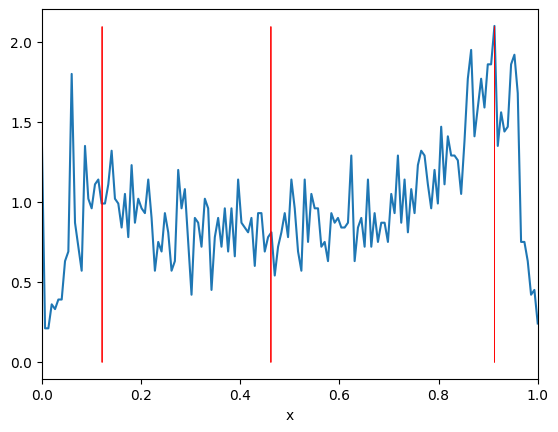

In [321]:
x = np.linspace(omega[0],omega[1],Nbins)

plt.xlabel("x")
plt.xlim(0.0,1.0)
plt.plot(x,bins)

b = np.linspace(0,3.0,N)
closest_s=min(range(len(b)), key=lambda i: abs(b[i]-2))
critical_x_values = [x_val for s_val, x_val in critical_points if abs(s_val - b[closest_s]) < 0.01]
print(f"Critical points at s={b[closest_s]}: {critical_x_values}")
for x_val in critical_x_values:
    plt.vlines(x_val, 0, max(bins), colors='red', linewidth=0.5)

this respects the distribution we calculated a bit more, but still is full of noise, i'm inclined to belive this is due to the big value of $s$ which might disturb the calculations, but still, the overal behaviour does match generally the distribution imposed by the critical points.

# Conclusions

the shape and behaviour of this particular model doesn't seem to be dependent on any particular relation between the parameters, the presence or not of a bifurcation is dependent by all of them.

as we discussed during the study of the deterministic part, there is no way of having 2 positive critical points, and once s enters in the equation it stops being quadratic and becomes cubic, therefore having 3 possible critical points.

the only noticible relationship is that at a larger k the gradient of the inequality becomes smaller while with a grater s it becomes bigger, but obviously the greater the s the more noise influeces the final result, creating a very noisy PMF.